In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine,reflect = True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Save references to each table
Station = Base.classes.station

In [12]:
Measurement = Base.classes.measurement

In [13]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# Calculate the date 1 year ago from the last data point in the database
last_twelve_months = dt.date(2017,8,23)-dt.timedelta(days=365)
last_twelve_months

datetime.date(2016, 8, 23)

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=last_twelve_months).all()
#results

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
measurements = pd.DataFrame(results) 
measurements = measurements.rename(columns={"date": "Date","prcp": "Precipitation"})
measurements.set_index(measurements["Date"], inplace=True)
del measurements["Date"]
measurements.head(5)

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [17]:
# Sort the dataframe by date
measurements = measurements.sort_values("Date")
measurements

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


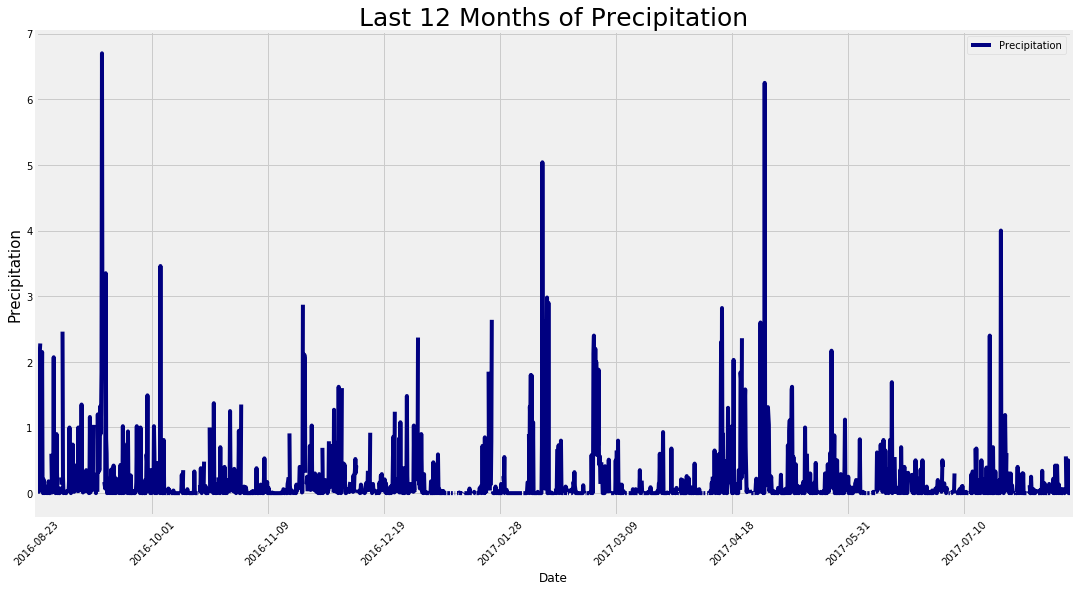

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_plot = measurements.plot(figsize = (15,8), color = 'navy', rot=45)
plt.tight_layout()
plt.ylabel("Precipitation", size=15)
plt.title("Last 12 Months of Precipitation", size=25)
plt.savefig("Last_12_Months_of_Precipitation.png")

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurements.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
no_stations = Session.query(func.count(Station.station)).all()
print(f'There are {no_stations} stations available')

There are [(9,)] stations available


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# Choose the station with the highest number of temperature observations.
# List the stations and the counts in descending order.
active_stations= Session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
lowest_temp = Session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()
lowest_temp

[(54.0, 85.0, 71.66378066378067)]

In [31]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_twelve_months = dt.date(2017,8,23)-dt.timedelta(days=365)
station_9281 = Session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").\
    filter(Measurement.date>=last_twelve_months).all()


In [30]:
station_9281_df = pd.DataFrame(station_9281, columns = ["tobs"])
station_9281_df = station_9281_df.rename(columns = {"tobs": "Temperature"})
station_9281_df.head(10)

,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
5,73.0
6,78.0
7,77.0
8,78.0
9,80.0


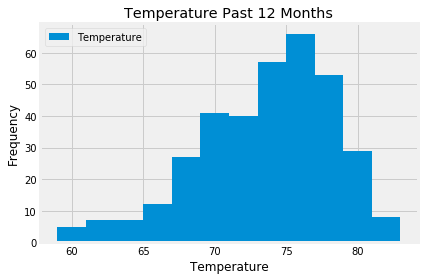

In [34]:
station_9281_df.plot.hist(bins=12)
plt.title("Temperature Past 12 Months")
plt.xlabel("Temperature")
plt.tight_layout()
plt.savefig("Temperature_Past_12_Months")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
